<a href="https://colab.research.google.com/github/RandyT97/CAP4630/blob/master/HW2Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST fashion data set

## Loading the MNIST fashion data set

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Exploring the format of the MNIST fashion data set

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_images)

60000

In [4]:
train_images.ndim

3

In [5]:
train_images.dtype

dtype('uint8')

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

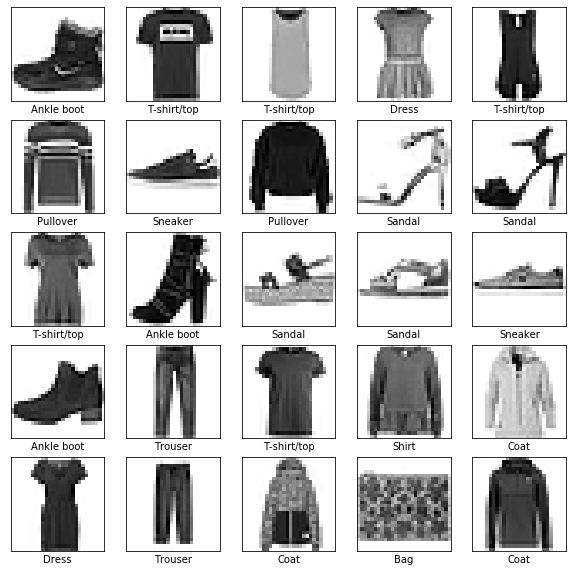

In [10]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

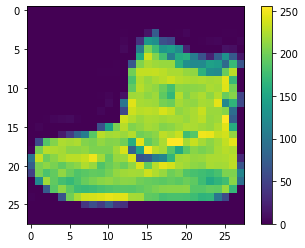

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Overfit model

In [13]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5574 - acc: 0.8051 - val_loss: 0.4614 - val_acc: 0.8352
Epoch 2/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4131 - acc: 0.8518 - val_loss: 0.4244 - val_acc: 0.8496
Epoch 3/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3771 - acc: 0.8626 - val_loss: 0.3952 - val_acc: 0.8578
Epoch 4/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3541 - acc: 0.8699 - val_loss: 0.3862 - val_acc: 0.8611
Epoch 5/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3355 - acc: 0.8770 - val_loss: 0.3994 - val_acc: 0.8597
Epoch 6/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3227 - acc: 0.8811 - val_loss: 0.3682 - val_acc: 0.8666
Epoch 7/20
60000/60000 [===========

## Evaluate accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.3713 - acc: 0.8711
Test accuracy: 0.8711


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

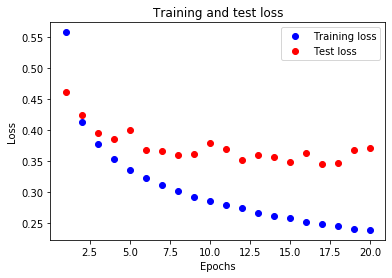

In [16]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

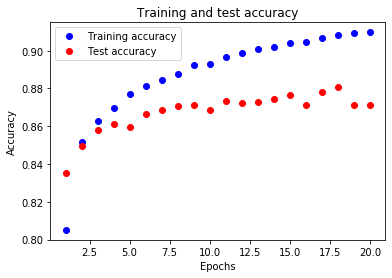

In [18]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Best fit model

In [116]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 8
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 86us/sample - loss: 0.8205 - acc: 0.7080 - val_loss: 0.4866 - val_acc: 0.8250
Epoch 2/8
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5585 - acc: 0.8070 - val_loss: 0.4401 - val_acc: 0.8388
Epoch 3/8
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5104 - acc: 0.8230 - val_loss: 0.4163 - val_acc: 0.8563
Epoch 4/8
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4794 - acc: 0.8341 - val_loss: 0.4299 - val_acc: 0.8431
Epoch 5/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4575 - acc: 0.8400 - val_loss: 0.4104 - val_acc: 0.8551
Epoch 6/8
60000/60000 [==============================] - 5s 75us/sample - loss: 0.4403 - acc: 0.8461 - val_loss: 0.4225 - val_acc: 0.8509
Epoch 7/8
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4303 - acc: 0.8490 - val_loss: 0.3970 - 

## Evaluate accuracy

In [117]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.4028 - acc: 0.8550
Test accuracy: 0.855


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

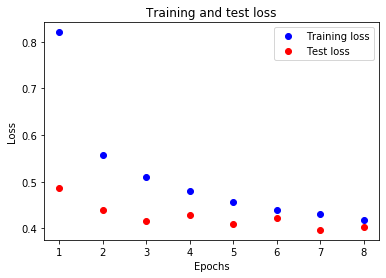

In [119]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

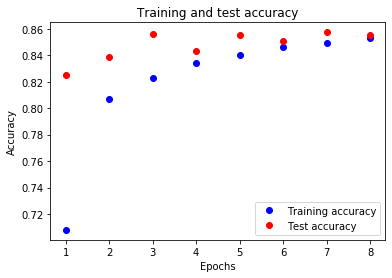

In [121]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Underfit model

In [72]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.relu)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 8
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 4s 61us/sample - loss: 2.3497 - acc: 0.1027 - val_loss: 2.3019 - val_acc: 0.1003
Epoch 2/8
60000/60000 [==============================] - 3s 57us/sample - loss: 2.3027 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/8
60000/60000 [==============================] - 3s 57us/sample - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/8
60000/60000 [==============================] - 4s 59us/sample - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/8
60000/60000 [==============================] - 3s 56us/sample - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/8
60000/60000 [==============================] - 3s 56us/sample - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/8
60000/60000 [==============================] - 3s 56us/sample - loss: 2.3025 - acc: 0.1000 - val_loss: 2.3026 - 

## Evaluate accuracy

In [73]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 31us/sample - loss: 2.3026 - acc: 0.1000
Test accuracy: 0.1


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

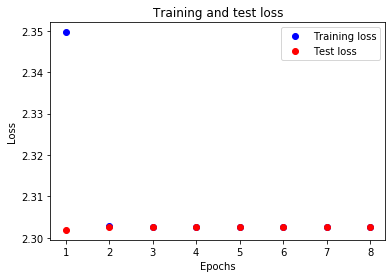

In [75]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

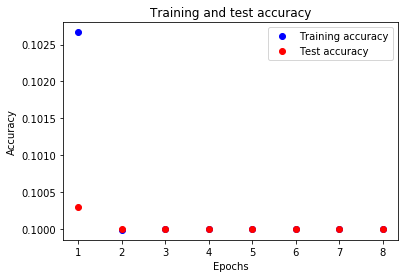

In [77]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()